In [1]:
import os
import sys
import time
import warnings
import platform
from datetime import datetime,timedelta

# Basic Data Analysis Tools
import numpy as np
import pandas as pd

# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# import FinanceDataReader as fdr

# Exploratory Data Analysis (EDA)
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.offline as offline
import plotly.graph_objs as go
import scipy as sp

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# Train / Test Dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Machine Learning Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# from vecstack import stacking

# Hyper Param Optimization
from sklearn.model_selection import GridSearchCV

# testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# from sklearn.externals import joblib 

In [2]:
from ngboost.ngboost import NGBoost
from ngboost.learners import default_tree_learner
from ngboost.scores import CRPS, MLE
from ngboost.distns import LogNormal, Normal

In [3]:
from dateutil.relativedelta import *

In [4]:
import datetime, time

In [5]:
# pd.options.display.max_rows = 999
# pd.options.display.max_columns = 100

In [92]:
# ['이지바이오.xlsx', '한일사료.xlsx', '케이씨피드.xlsx', '대주산업.xlsx']
company = '대주산업'

In [93]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\축산업')
data = pd.read_csv('data_2_{}.csv'.format(company),thousands=',',index_col=0)
# rl_data = pd.read_csv('rl_data.csv',thousands=',',index_col=0)
data.head()

,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,...,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150,target
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,87143282.0,42747329.0,23192879.0,615.0,133017.0,169021.0,406650.0,-256333.0,3108747.0,1253.89,...,-0.065426,0.009876,-0.975610,-0.535738,-0.802886,-0.480022,-0.130766,-0.137869,-0.152548,-1
2013-08-07,87143282.0,42747329.0,23192879.0,609.0,122216.0,94354.0,406650.0,-256333.0,3108747.0,1253.89,...,-0.125135,-0.047453,-1.470588,-0.806917,-0.742008,-0.545938,-0.268734,-0.150754,-0.172184,-1
2013-08-08,87143282.0,42747329.0,23192879.0,603.0,129125.0,173350.0,406650.0,-256333.0,3108747.0,1253.89,...,-0.124931,-0.079418,-1.967213,-1.243436,-0.810682,-0.677022,-0.412041,-0.164188,-0.177042,-2
2013-08-09,87143282.0,42747329.0,23192879.0,598.0,143341.0,164927.0,406650.0,-256333.0,3108747.0,1253.89,...,-0.132161,-0.036942,-0.833333,-1.471137,-1.171710,-0.777743,-0.520975,-0.212182,-0.214217,-1
2013-08-12,87143282.0,42747329.0,23192879.0,595.0,140110.0,98897.0,406650.0,-256333.0,3108747.0,1253.89,...,-0.083220,-0.102659,-0.497512,-1.423712,-1.306171,-0.861077,-0.490736,-0.213481,-0.203697,-1


In [94]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = data.corr(), linewidths=.5)
# plt.show()

In [95]:
# data.columns

In [96]:
data['profit_merge'] = data[['term_profit(1000)', 'gross_margin(1000)', 'adjusted_BPS']].mean(axis=1)
data['livecattle_merge'] = data[['close_livecattle_f', 'open_livecattle_f','high_livecattle_f', 'low_livecattle_f']].mean(axis=1)
data['kospi_vol_merge'] = data[['close_kospi_volatility','open_kospi_volatility', 'high_kospi_volatility','low_kospi_volatility']].mean(axis=1)
data['ko_bond_merge'] = data[['Price_South Korea 5-Year Bond Yield','Open_South Korea 5-Year Bond Yield','High_South Korea 5-Year Bond Yield','Low_South Korea 5-Year Bond Yield']].mean(axis=1)
data['usd_krw_merge'] = data[['close_USD_KRW','open_USD_KRW', 'high_USD_KRW', 'low_USD_KRW']].mean(axis=1)
data['leanhog_merge'] = data[['close_leanhog_f', 'open_leanhog_f', 'high_leanhog_f', 'low_leanhog_f']].mean(axis=1)

In [97]:
data['profit_mean3']=data['profit_merge'].rolling(window=3).mean()
data['livecattle_mean3']=data['livecattle_merge'].rolling(window=3).mean()
data['kospivol_mean3']=data['kospi_vol_merge'].rolling(window=3).mean()
data['ko_bond_mean3']=data['ko_bond_merge'].rolling(window=3).mean()
data['usd_krw_mean3']=data['usd_krw_merge'].rolling(window=3).mean()
data['leanhog_mean3']=data['leanhog_merge'].rolling(window=3).mean()

In [98]:
data['profit_std5']=data['profit_merge'].rolling(window=5).std()
data['livecattle_std5']=data['livecattle_merge'].rolling(window=5).std()
data['kospivol_std5']=data['kospi_vol_merge'].rolling(window=5).std()
data['ko_bond_std5']=data['ko_bond_merge'].rolling(window=5).std()
data['usd_krw_std5']=data['usd_krw_merge'].rolling(window=5).std()
data['leanhog_std5']=data['leanhog_merge'].rolling(window=5).std()

In [99]:
# ! pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

In [100]:
livestock_feature =['asset(1000)', 'debt(1000)', 'sales(1000)', 'adjusted_price',
                    'volumne(mean_5d)(week)', 'volumne(week)', 
#  'profit(1000)','term_profit(1000)', 'gross_margin(1000)',
                    'profit_merge','profit_mean3','profit_std5',
                    'adjusted_BPS', 'adjusted_EPS',
#  'close_livecattle_f', 'open_livecattle_f','high_livecattle_f', 'low_livecattle_f', 
                    'livecattle_merge','livecattle_mean3','livecattle_std5',
                    'volume_livecattle_f',
                    'change%_livecattle_f', 'BDI',
#  'close_kospi_volatility','open_kospi_volatility', 'high_kospi_volatility','low_kospi_volatility',
                    'kospi_vol_merge','kospivol_mean3','kospivol_std5',
                    'change%_kospi_volatility',
# 'Price_South Korea 5-Year Bond Yield','Open_South Korea 5-Year Bond Yield','High_South Korea 5-Year Bond Yield','Low_South Korea 5-Year Bond Yield',
                    'ko_bond_merge','ko_bond_mean3','ko_bond_std5', 
                    'Change %_South Korea 5-Year Bond Yield', 
#  'close_USD_KRW','open_USD_KRW', 'high_USD_KRW', 'low_USD_KRW',
                    'usd_krw_merge','usd_krw_mean3','usd_krw_std5',
                    'change%_USD_KRW',
# 'close_leanhog_f', 'open_leanhog_f', 'high_leanhog_f', 'low_leanhog_f',
                    'leanhog_merge','leanhog_mean3','leanhog_std5',
                    'volume_leanhog_f', 'change%_leanhog_f', 'rsi_14', 'macd', 'cci', 'adx',
                    'stoch_slowk', 'stoch_slowd', 'willr', 'momentum', 'roc', 'ema20',
                    'adosc', 'obv', 'profit_rate',
                    'rate_rolling_3', 'rate_rolling_5', 'rate_rolling_10',
                    'rate_rolling_30', 'rate_rolling_120', 'rate_rolling_150', 'target']

In [101]:
event_feature = ['event1', 'event2', 'event3', 'event4', 'event5',
                    'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
                    'event13', 'event14', 'event15', 'event16']

In [102]:
all_feature = ['asset(1000)', 'debt(1000)', 'sales(1000)', 'adjusted_price',
                    'volumne(mean_5d)(week)', 'volumne(week)', 
#  'profit(1000)','term_profit(1000)', 'gross_margin(1000)',
                    'profit_merge','profit_mean3','profit_std5',
                    'adjusted_BPS', 'adjusted_EPS',
#  'close_livecattle_f', 'open_livecattle_f','high_livecattle_f', 'low_livecattle_f', 
                    'livecattle_merge','livecattle_mean3','livecattle_std5',
                    'volume_livecattle_f',
                    'change%_livecattle_f', 'BDI',
#  'close_kospi_volatility','open_kospi_volatility', 'high_kospi_volatility','low_kospi_volatility',
                    'kospi_vol_merge','kospivol_mean3','kospivol_std5',
                    'change%_kospi_volatility',
# 'Price_South Korea 5-Year Bond Yield','Open_South Korea 5-Year Bond Yield','High_South Korea 5-Year Bond Yield','Low_South Korea 5-Year Bond Yield',
                    'ko_bond_merge','ko_bond_mean3','ko_bond_std5', 
                    'Change %_South Korea 5-Year Bond Yield', 
#  'close_USD_KRW','open_USD_KRW', 'high_USD_KRW', 'low_USD_KRW',
                    'usd_krw_merge','usd_krw_mean3','usd_krw_std5',
                    'change%_USD_KRW',
# 'close_leanhog_f', 'open_leanhog_f', 'high_leanhog_f', 'low_leanhog_f',
                    'leanhog_merge','leanhog_mean3','leanhog_std5',
                    'volume_leanhog_f', 'change%_leanhog_f', 'rsi_14', 'macd', 'cci', 'adx',
                    'stoch_slowk', 'stoch_slowd', 'willr', 'momentum', 'roc', 'ema20',
                    'adosc', 'obv', 'profit_rate',
                    'rate_rolling_3', 'rate_rolling_5', 'rate_rolling_10',
                    'rate_rolling_30', 'rate_rolling_120', 'rate_rolling_150', 'target',
              'event1', 'event2', 'event3', 'event4', 'event5',
                    'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
                    'event13', 'event14', 'event15', 'event16']

In [103]:
data1 = data[all_feature]

In [104]:
data1.to_csv("data_{}.csv".format(company))

In [19]:
data = data[livestock_feature]

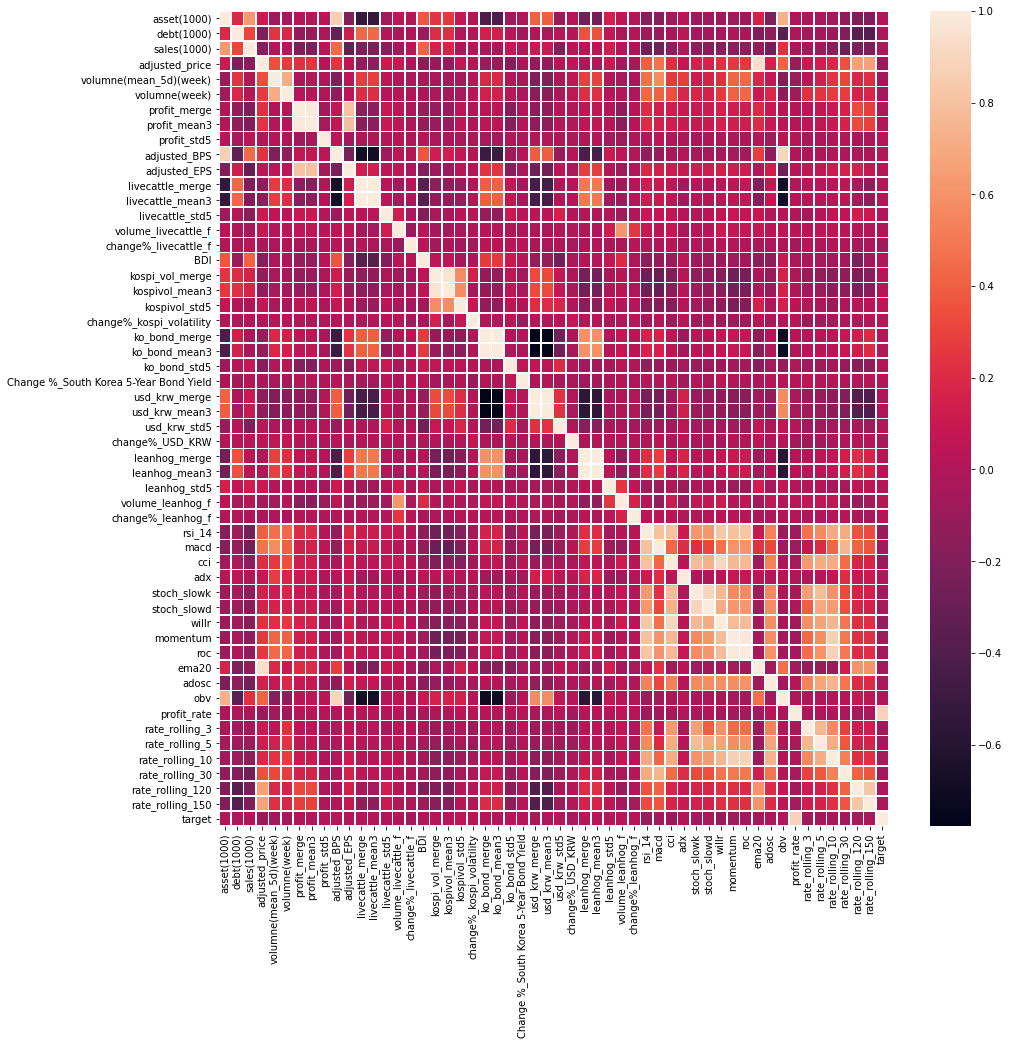

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), linewidths=.5)
plt.show()

좀 줄이기

In [21]:
test_data = data['2019':]
# test_data.to_csv('test.csv')

train_data = data['2015':'2019']
# train_data.to_csv('train.csv') 

train_data = train_data.reset_index()
test_data = test_data.reset_index()

train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

col = train_data.columns.to_list()
del col[col.index('target')]
del col[col.index('profit_rate')]
# del col[col.index('Date')]

X = train_data[col]
y = train_data['target']

In [22]:
test_X = test_data[col]
test_y = test_data['target']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2019)

In [23]:
date_columns = 'Date'
# train_data[date_columns]

In [24]:
# X_train = X_train.drop('Date', axis=1)
# X_val = X_val.drop('Date', axis=1)

In [25]:
class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='Date', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
                  "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits

In [26]:
tscv = TimeBasedCV(train_period=300,
                   test_period=80,
                   freq='days')
# for train_index, test_index in tscv.split(X, validation_split_date=datetime.date(2014,1,1)):
#     print(train_index, test_index)

In [27]:
def sliding_window_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 학습 중인 모델 : {}'.format(model_name))
    scores = []
    for train_index, test_index in tscv.split(X, validation_split_date=datetime.date(2014,1,1)):
# X_train, X_val, y_train, y_val
        X_train   = X.loc[train_index].drop('Date', axis=1)
        y_train = y.loc[train_index]

        X_val    = X.loc[test_index].drop('Date', axis=1)
        y_val  = y.loc[test_index]

        # if needed, do preprocessing here

#         model = model()
        model.fit(X_train,y_train)

        preds = model.predict(X_val)

        # accuracy for the current fold only    
        r2score = model.score(X_val,y_val)

        scores.append(r2score)

    mean_score = np.round(np.mean(scores)*100, 2)
#     fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
#     print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, scores, mean_score

In [28]:
def cross_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 교차검증 중인 모델 : {}'.format(model_name))

    score = cross_validate(model,
                           X_train.drop('Date', axis=1),
                           y_train,
                           cv=k_fold,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

    mean_score = np.round(np.mean(score['test_score'])*100, 2)
    fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
    print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, score, mean_score, fit_time_per_cv

In [29]:
k_fold = KFold(n_splits=5,
               shuffle=True,
               random_state=0)

In [30]:
def compare_model_score(model):
    print('학습용 / 검증요 데이터 비교...')
    model.fit(X_train.drop('Date', axis=1), y_train)
    print('학습용 데이터 평가 중...')
    model.score(X_train.drop('Date', axis=1),y_train)
    print('검증용 데이터 평가 중...')
    model.score(X_val.drop('Date', axis=1),y_val)

In [31]:
def show_test_result(y_test, y_pred):
    LINE_LENGHT = 60
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('total result'.upper()))
    print('='*LINE_LENGHT)
    print('{:<10} : {}'.format('RECALL', recall_score(y_test, y_pred)))
    print('{:<10} : {}'.format('PRECISION', precision_score(y_test, y_pred)))
    print('{:<10} : {}'.format('F1 SCORE', f1_score(y_test, y_pred)))
    print('{:<10} : {}'.format('ROC SCORE', roc_auc_score(y_test, y_pred)))
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('classification report'.upper()))
    print('='*LINE_LENGHT)
    print(classification_report(y_test, y_pred))# Decision Tree

In [32]:
model_score = dict()

# lightGBM

In [33]:
# LightGBM

# model_lgbm = LGBMClassifier(boosting_type='gbdt', 
#                             class_weight=None, 
#                             colsample_bytree=1.0,
#                             importance_type='split', 
#                             lambda_l1=1.5, lambda_l2=1,
#                             learning_rate=0.001, 
#                             max_depth=20 , 
#                             min_child_samples=20,
#                             min_child_weight=0.001, 
#                             min_data_in_leaf=3,
#                             min_sum_hessian_in_leaf = 10,
#                             min_split_gain=0.0,
#                             n_estimators=100, 
#                             n_jobs=-1, 
#                             num_boost_round=1000, 
#                             num_leaves=45,
#                             objective=None, 
#                             random_state=None, 
#                             reg_alpha=0.1, 
#                             reg_lambda=0.0,
#                             silent=True,
#                             subsample=1.0, 
#                             subsample_for_bin=200000,
#                             subsample_freq=0,
#                             bagging_fraction = 0.5,
#                             feature_fraction = 0.5)

model_lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                            importance_type='split', lambda_l1=1, lambda_l2=1,
                            learning_rate=1, max_depth=25 , min_child_samples=5,
                            min_child_weight=0.001, min_data_in_leaf=5, min_split_gain=0.0,
                            n_estimators=100, n_jobs=-1, num_boost_round=1000, num_leaves=31,
                            objective=None, random_state=None, reg_alpha=0.1, reg_lambda=0.0,
                            silent=True, subsample=1.0, subsample_for_bin=200000,
                            subsample_freq=0)

#sliding - window
# model_name, _, mean_score = sliding_window_validate_with_model(model_lgbm)
# model_score[model_name] = mean_score
# model_lgbm.fit(X_train.drop('Date', axis=1),y_train)

# cross_valid
model_name, _, mean_score,_ = cross_validate_with_model(model_lgbm)
model_score[model_name] = mean_score
model_lgbm.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : LGBMClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



Test Mean Score : 23.21
Fit Time / Each CV : 1.57s


LGBMClassifier(lambda_l1=1, lambda_l2=1, learning_rate=1, max_depth=25,
               min_child_samples=5, min_data_in_leaf=5, num_boost_round=1000,
               reg_alpha=0.1)

In [34]:
model_lgbm

LGBMClassifier(lambda_l1=1, lambda_l2=1, learning_rate=1, max_depth=25,
               min_child_samples=5, min_data_in_leaf=5, num_boost_round=1000,
               reg_alpha=0.1)

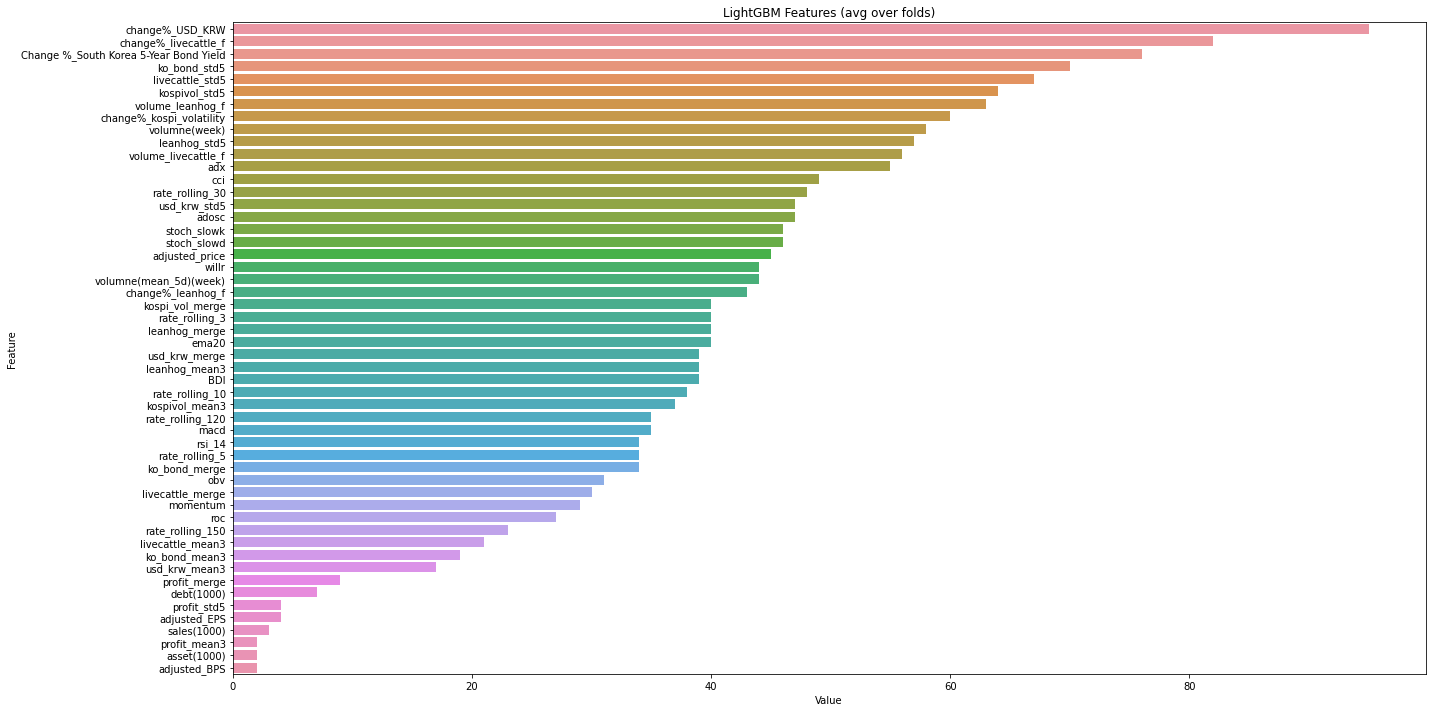

<Figure size 432x288 with 0 Axes>

In [35]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importances_,X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig(f'lgbm_importances_{company}.png')

In [36]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head()

,Value,Feature
51,95,change%_USD_KRW
50,82,change%_livecattle_f
49,76,Change %_South Korea 5-Year Bond Yield
48,70,ko_bond_std5
47,67,livecattle_std5


In [37]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values

array(['change%_USD_KRW', 'change%_livecattle_f',
       'Change %_South Korea 5-Year Bond Yield', 'ko_bond_std5',
       'livecattle_std5', 'kospivol_std5', 'volume_leanhog_f',
       'change%_kospi_volatility', 'volumne(week)', 'leanhog_std5',
       'volume_livecattle_f', 'adx', 'cci', 'rate_rolling_30',
       'usd_krw_std5', 'adosc', 'stoch_slowk', 'stoch_slowd',
       'adjusted_price', 'willr', 'volumne(mean_5d)(week)',
       'change%_leanhog_f', 'kospi_vol_merge', 'rate_rolling_3',
       'leanhog_merge', 'ema20', 'usd_krw_merge', 'leanhog_mean3', 'BDI',
       'rate_rolling_10'], dtype=object)

In [38]:
lgbm_feature = list(feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values[:])

In [39]:
event_feature

['event1',
 'event2',
 'event3',
 'event4',
 'event5',
 'event6',
 'event7',
 'event8',
 'event9',
 'event10',
 'event11',
 'event12',
 'event13',
 'event14',
 'event15',
 'event16']

In [40]:
data.columns

Index(['asset(1000)', 'debt(1000)', 'sales(1000)', 'adjusted_price',
       'volumne(mean_5d)(week)', 'volumne(week)', 'profit_merge',
       'profit_mean3', 'profit_std5', 'adjusted_BPS', 'adjusted_EPS',
       'livecattle_merge', 'livecattle_mean3', 'livecattle_std5',
       'volume_livecattle_f', 'change%_livecattle_f', 'BDI', 'kospi_vol_merge',
       'kospivol_mean3', 'kospivol_std5', 'change%_kospi_volatility',
       'ko_bond_merge', 'ko_bond_mean3', 'ko_bond_std5',
       'Change %_South Korea 5-Year Bond Yield', 'usd_krw_merge',
       'usd_krw_mean3', 'usd_krw_std5', 'change%_USD_KRW', 'leanhog_merge',
       'leanhog_mean3', 'leanhog_std5', 'volume_leanhog_f',
       'change%_leanhog_f', 'rsi_14', 'macd', 'cci', 'adx', 'stoch_slowk',
       'stoch_slowd', 'willr', 'momentum', 'roc', 'ema20', 'adosc', 'obv',
       'profit_rate', 'rate_rolling_3', 'rate_rolling_5', 'rate_rolling_10',
       'rate_rolling_30', 'rate_rolling_120', 'rate_rolling_150', 'target'],
      dtype='obj

In [41]:
# data = data[['volume_livecattle_f', 'usd_krw_std5', 'livecattle_mean3',
#        'ko_bond_std5', 'livecattle_std5', 'ko_bond_mean3',
#        'kospivol_mean3', 'volume_leanhog_f', 'leanhog_mean3',
#        'kospivol_std5', 'volumne(mean_5d)(week)', 'leanhog_std5',
#         'rate_rolling_5', 'BDI', 'adjusted_price',
#        'stoch_slowd', 'rate_rolling_10', 'usd_krw_mean3', 'stoch_slowk',
#        'sales(1000)', 'cci', 'adx', 'macd', 'ema20',
#        'rate_rolling_30', 'Change %_South Korea 5-Year Bond Yield',
#        'rate_rolling_3', 'roc','event1','event2', 'event3', 'event4',
#        'event5', 'event6', 'event7','event8','event9', 'event10',
#        'event11','event12','event13','event14', 'event15', 'event16','profit_rate','target']]

# Random Forest

In [42]:
# Random Forest
model_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model_name, _, mean_score, _ = cross_validate_with_model(model_rf)
model_score[model_name] = mean_score
model_rf.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


Test Mean Score : 24.87
Fit Time / Each CV : 2.53s


RandomForestClassifier(max_features='sqrt', n_estimators=700)

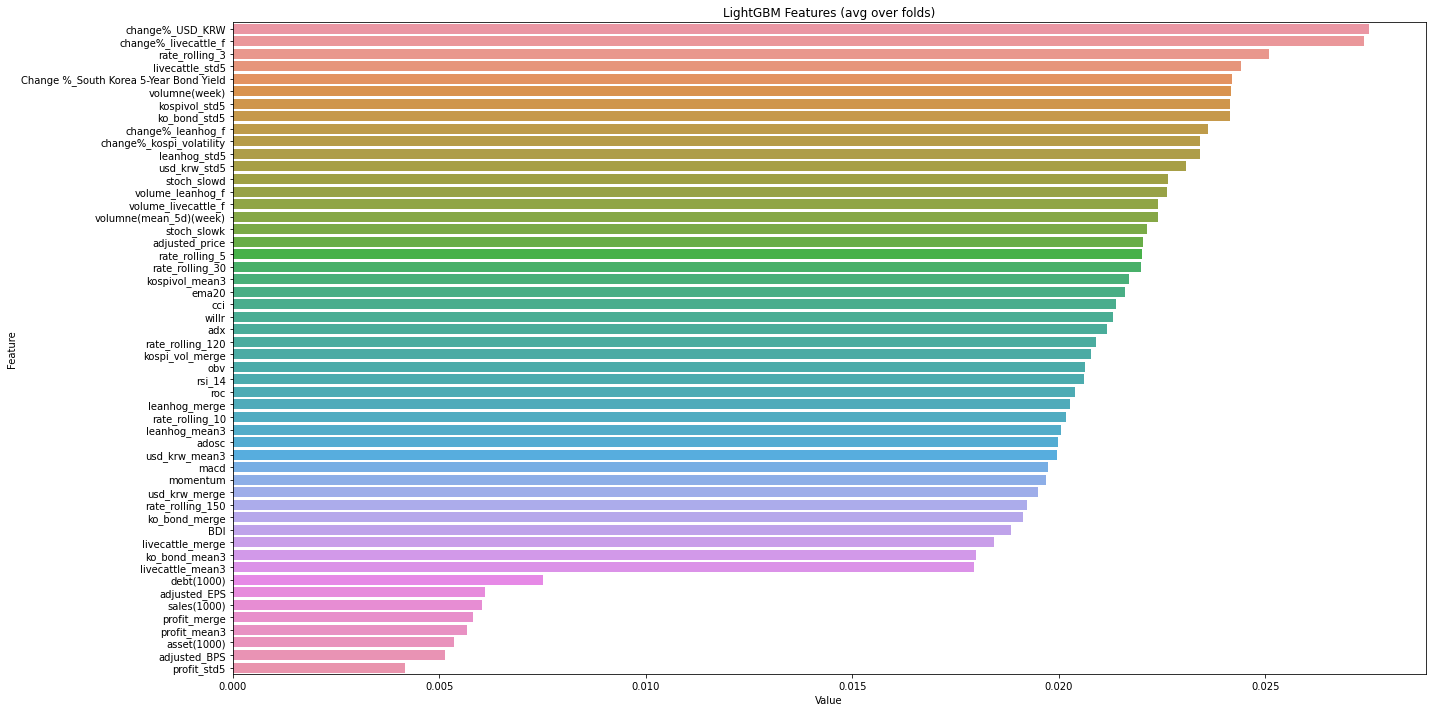

<Figure size 432x288 with 0 Axes>

In [43]:
feature_imp = pd.DataFrame(sorted(zip(model_rf.feature_importances_, X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig(f'rf_importances_{company}.png')

In [44]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head()

,Value,Feature
51,0.027505,change%_USD_KRW
50,0.027386,change%_livecattle_f
49,0.025083,rate_rolling_3
48,0.024411,livecattle_std5
47,0.024196,Change %_South Korea 5-Year Bond Yield


In [45]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values

array(['change%_USD_KRW', 'change%_livecattle_f', 'rate_rolling_3',
       'livecattle_std5', 'Change %_South Korea 5-Year Bond Yield',
       'volumne(week)', 'kospivol_std5', 'ko_bond_std5',
       'change%_leanhog_f', 'change%_kospi_volatility', 'leanhog_std5',
       'usd_krw_std5', 'stoch_slowd', 'volume_leanhog_f',
       'volume_livecattle_f', 'volumne(mean_5d)(week)', 'stoch_slowk',
       'adjusted_price', 'rate_rolling_5', 'rate_rolling_30',
       'kospivol_mean3', 'ema20', 'cci', 'willr', 'adx',
       'rate_rolling_120', 'kospi_vol_merge', 'obv', 'rsi_14', 'roc'],
      dtype=object)

In [46]:
rf_feature = list(feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values[:])

# CatBoost

In [47]:
from catboost import CatBoostClassifier

In [48]:
# CatBoost
# model_catb = CatBoostClassifier(iterations=300,
#                              learning_rate=0.05,
#                              depth=10,
# #                              eval_metric='RMSE',
#                              random_seed = 42,
#                                 loss_function='MultiClass',
#                              bagging_temperature = 0.2,
#                              od_type='Iter',
#                              metric_period = 50,
#                              od_wait=20)
model_catb = CatBoostClassifier()
model_name, _, mean_score, _ = cross_validate_with_model(model_catb)
model_score[model_name] = mean_score
model_catb.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : CatBoostClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


Test Mean Score : 24.35
Fit Time / Each CV : 96.92s
Learning rate set to 0.078151
0:	learn: 1.5970529	total: 106ms	remaining: 1m 45s
1:	learn: 1.5842430	total: 134ms	remaining: 1m 7s
2:	learn: 1.5736762	total: 176ms	remaining: 58.5s
3:	learn: 1.5610278	total: 208ms	remaining: 51.7s
4:	learn: 1.5506040	total: 237ms	remaining: 47.2s
5:	learn: 1.5394116	total: 266ms	remaining: 44.1s
6:	learn: 1.5310061	total: 296ms	remaining: 41.9s
7:	learn: 1.5204462	total: 325ms	remaining: 40.4s
8:	learn: 1.5105707	total: 360ms	remaining: 39.6s
9:	learn: 1.5026325	total: 387ms	remaining: 38.3s
10:	learn: 1.4952582	total: 416ms	remaining: 37.4s
11:	learn: 1.4878054	total: 445ms	remaining: 36.6s
12:	learn: 1.4797047	total: 473ms	remaining: 35.9s
13:	learn: 1.4692189	total: 503ms	remaining: 35.4s
14:	learn: 1.4610078	total: 538ms	remaining: 35.3s
15:	learn: 1.4535706	total: 567ms	remaining: 34.9s
16:	learn: 1.4475424	total: 597ms	remaining: 34.5s
17:	learn: 1.4384048	total: 627ms	remaining: 34.2s
18:	learn

163:	learn: 0.8133306	total: 5.02s	remaining: 25.6s
164:	learn: 0.8112119	total: 5.05s	remaining: 25.6s
165:	learn: 0.8077707	total: 5.08s	remaining: 25.5s
166:	learn: 0.8045663	total: 5.11s	remaining: 25.5s
167:	learn: 0.8003706	total: 5.14s	remaining: 25.4s
168:	learn: 0.7969119	total: 5.17s	remaining: 25.4s
169:	learn: 0.7940205	total: 5.2s	remaining: 25.4s
170:	learn: 0.7924963	total: 5.23s	remaining: 25.4s
171:	learn: 0.7882585	total: 5.26s	remaining: 25.3s
172:	learn: 0.7849133	total: 5.29s	remaining: 25.3s
173:	learn: 0.7837387	total: 5.31s	remaining: 25.2s
174:	learn: 0.7803668	total: 5.34s	remaining: 25.2s
175:	learn: 0.7780051	total: 5.37s	remaining: 25.1s
176:	learn: 0.7747854	total: 5.4s	remaining: 25.1s
177:	learn: 0.7720357	total: 5.43s	remaining: 25.1s
178:	learn: 0.7690793	total: 5.46s	remaining: 25s
179:	learn: 0.7671981	total: 5.49s	remaining: 25s
180:	learn: 0.7614445	total: 5.52s	remaining: 25s
181:	learn: 0.7591720	total: 5.55s	remaining: 24.9s
182:	learn: 0.756445

329:	learn: 0.4751955	total: 9.93s	remaining: 20.2s
330:	learn: 0.4734267	total: 9.96s	remaining: 20.1s
331:	learn: 0.4720676	total: 9.99s	remaining: 20.1s
332:	learn: 0.4705793	total: 10s	remaining: 20.1s
333:	learn: 0.4694232	total: 10.1s	remaining: 20s
334:	learn: 0.4684780	total: 10.1s	remaining: 20s
335:	learn: 0.4670029	total: 10.1s	remaining: 20s
336:	learn: 0.4650401	total: 10.1s	remaining: 19.9s
337:	learn: 0.4630259	total: 10.2s	remaining: 19.9s
338:	learn: 0.4619583	total: 10.2s	remaining: 19.9s
339:	learn: 0.4606945	total: 10.2s	remaining: 19.8s
340:	learn: 0.4594970	total: 10.3s	remaining: 19.8s
341:	learn: 0.4586503	total: 10.3s	remaining: 19.8s
342:	learn: 0.4579678	total: 10.3s	remaining: 19.8s
343:	learn: 0.4573785	total: 10.3s	remaining: 19.7s
344:	learn: 0.4562293	total: 10.4s	remaining: 19.7s
345:	learn: 0.4551207	total: 10.4s	remaining: 19.6s
346:	learn: 0.4541787	total: 10.4s	remaining: 19.6s
347:	learn: 0.4530631	total: 10.5s	remaining: 19.6s
348:	learn: 0.451591

491:	learn: 0.3050688	total: 14.6s	remaining: 15.1s
492:	learn: 0.3043042	total: 14.7s	remaining: 15.1s
493:	learn: 0.3033346	total: 14.7s	remaining: 15.1s
494:	learn: 0.3025759	total: 14.7s	remaining: 15s
495:	learn: 0.3019120	total: 14.8s	remaining: 15s
496:	learn: 0.3014953	total: 14.8s	remaining: 15s
497:	learn: 0.3007257	total: 14.8s	remaining: 14.9s
498:	learn: 0.2998072	total: 14.9s	remaining: 14.9s
499:	learn: 0.2987184	total: 14.9s	remaining: 14.9s
500:	learn: 0.2977854	total: 14.9s	remaining: 14.8s
501:	learn: 0.2969754	total: 14.9s	remaining: 14.8s
502:	learn: 0.2959231	total: 15s	remaining: 14.8s
503:	learn: 0.2954324	total: 15s	remaining: 14.8s
504:	learn: 0.2945661	total: 15s	remaining: 14.7s
505:	learn: 0.2938587	total: 15.1s	remaining: 14.7s
506:	learn: 0.2932976	total: 15.1s	remaining: 14.7s
507:	learn: 0.2927819	total: 15.1s	remaining: 14.6s
508:	learn: 0.2919577	total: 15.1s	remaining: 14.6s
509:	learn: 0.2911772	total: 15.2s	remaining: 14.6s
510:	learn: 0.2905574	to

655:	learn: 0.2087307	total: 19.4s	remaining: 10.2s
656:	learn: 0.2082956	total: 19.4s	remaining: 10.1s
657:	learn: 0.2076110	total: 19.5s	remaining: 10.1s
658:	learn: 0.2070953	total: 19.5s	remaining: 10.1s
659:	learn: 0.2065391	total: 19.5s	remaining: 10.1s
660:	learn: 0.2059532	total: 19.5s	remaining: 10s
661:	learn: 0.2054236	total: 19.6s	remaining: 10s
662:	learn: 0.2051453	total: 19.6s	remaining: 9.97s
663:	learn: 0.2046736	total: 19.6s	remaining: 9.94s
664:	learn: 0.2041228	total: 19.7s	remaining: 9.91s
665:	learn: 0.2035660	total: 19.7s	remaining: 9.88s
666:	learn: 0.2032645	total: 19.7s	remaining: 9.85s
667:	learn: 0.2030423	total: 19.8s	remaining: 9.82s
668:	learn: 0.2027617	total: 19.8s	remaining: 9.79s
669:	learn: 0.2021915	total: 19.8s	remaining: 9.76s
670:	learn: 0.2020886	total: 19.8s	remaining: 9.73s
671:	learn: 0.2015655	total: 19.9s	remaining: 9.7s
672:	learn: 0.2011891	total: 19.9s	remaining: 9.67s
673:	learn: 0.2010175	total: 19.9s	remaining: 9.64s
674:	learn: 0.200

817:	learn: 0.1510217	total: 24.1s	remaining: 5.37s
818:	learn: 0.1508507	total: 24.1s	remaining: 5.34s
819:	learn: 0.1505317	total: 24.2s	remaining: 5.31s
820:	learn: 0.1502842	total: 24.2s	remaining: 5.28s
821:	learn: 0.1500814	total: 24.2s	remaining: 5.25s
822:	learn: 0.1497639	total: 24.3s	remaining: 5.22s
823:	learn: 0.1493919	total: 24.3s	remaining: 5.19s
824:	learn: 0.1492186	total: 24.3s	remaining: 5.16s
825:	learn: 0.1490757	total: 24.3s	remaining: 5.13s
826:	learn: 0.1487087	total: 24.4s	remaining: 5.1s
827:	learn: 0.1484313	total: 24.4s	remaining: 5.07s
828:	learn: 0.1482446	total: 24.4s	remaining: 5.04s
829:	learn: 0.1477729	total: 24.5s	remaining: 5.01s
830:	learn: 0.1475167	total: 24.5s	remaining: 4.98s
831:	learn: 0.1473735	total: 24.5s	remaining: 4.95s
832:	learn: 0.1471717	total: 24.5s	remaining: 4.92s
833:	learn: 0.1469494	total: 24.6s	remaining: 4.89s
834:	learn: 0.1468574	total: 24.6s	remaining: 4.86s
835:	learn: 0.1466286	total: 24.6s	remaining: 4.83s
836:	learn: 0

981:	learn: 0.1156407	total: 28.9s	remaining: 529ms
982:	learn: 0.1154794	total: 28.9s	remaining: 500ms
983:	learn: 0.1152188	total: 28.9s	remaining: 470ms
984:	learn: 0.1150674	total: 29s	remaining: 441ms
985:	learn: 0.1149794	total: 29s	remaining: 411ms
986:	learn: 0.1148552	total: 29s	remaining: 382ms
987:	learn: 0.1146560	total: 29s	remaining: 353ms
988:	learn: 0.1143694	total: 29.1s	remaining: 323ms
989:	learn: 0.1142260	total: 29.1s	remaining: 294ms
990:	learn: 0.1139587	total: 29.1s	remaining: 265ms
991:	learn: 0.1138580	total: 29.2s	remaining: 235ms
992:	learn: 0.1136713	total: 29.2s	remaining: 206ms
993:	learn: 0.1134907	total: 29.2s	remaining: 176ms
994:	learn: 0.1132916	total: 29.2s	remaining: 147ms
995:	learn: 0.1131597	total: 29.3s	remaining: 118ms
996:	learn: 0.1129062	total: 29.3s	remaining: 88.2ms
997:	learn: 0.1127189	total: 29.3s	remaining: 58.8ms
998:	learn: 0.1125724	total: 29.4s	remaining: 29.4ms
999:	learn: 0.1124516	total: 29.4s	remaining: 0us


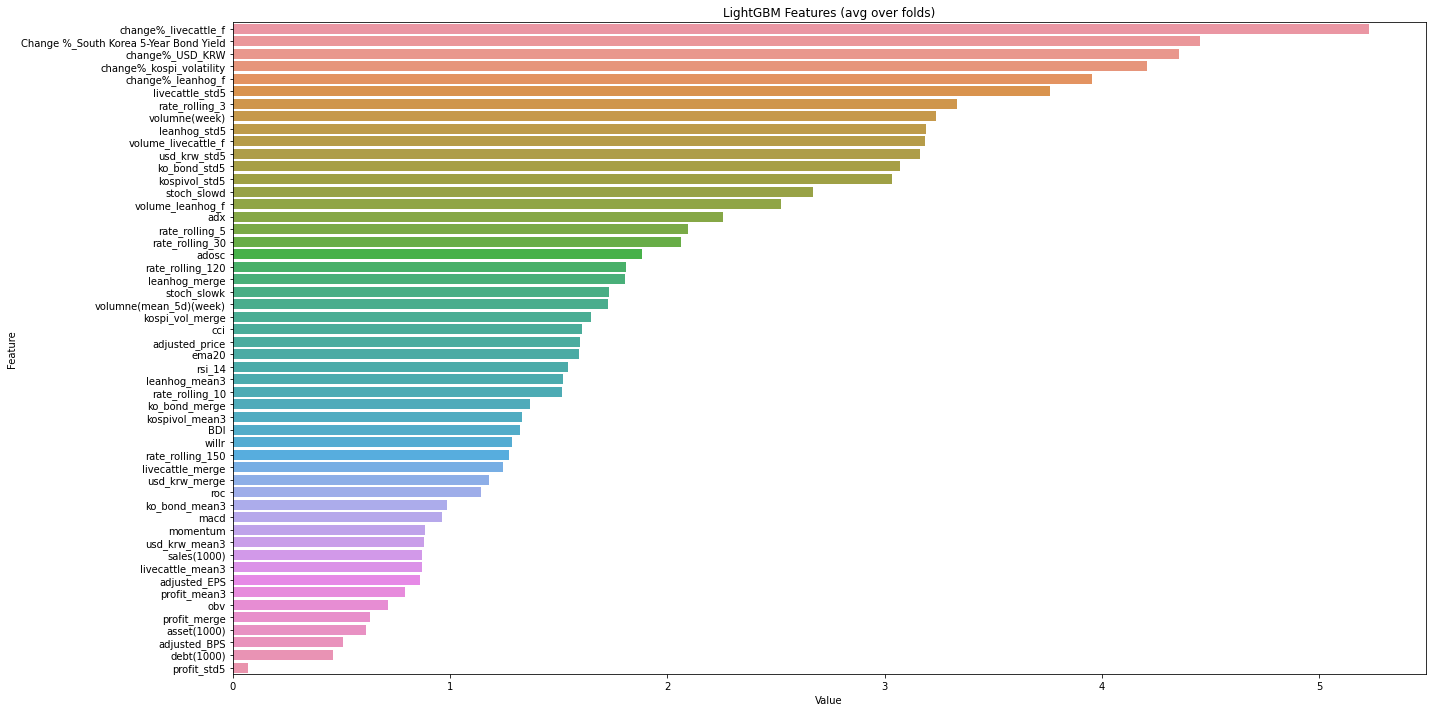

In [49]:
feature_imp = pd.DataFrame(sorted(zip(model_catb.feature_importances_,X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

In [50]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head()

,Value,Feature
51,5.228533,change%_livecattle_f
50,4.450969,Change %_South Korea 5-Year Bond Yield
49,4.356094,change%_USD_KRW
48,4.207779,change%_kospi_volatility
47,3.956426,change%_leanhog_f


In [51]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values

array(['change%_livecattle_f', 'Change %_South Korea 5-Year Bond Yield',
       'change%_USD_KRW', 'change%_kospi_volatility', 'change%_leanhog_f',
       'livecattle_std5', 'rate_rolling_3', 'volumne(week)',
       'leanhog_std5', 'volume_livecattle_f', 'usd_krw_std5',
       'ko_bond_std5', 'kospivol_std5', 'stoch_slowd', 'volume_leanhog_f',
       'adx', 'rate_rolling_5', 'rate_rolling_30', 'adosc',
       'rate_rolling_120', 'leanhog_merge', 'stoch_slowk',
       'volumne(mean_5d)(week)', 'kospi_vol_merge', 'cci',
       'adjusted_price', 'ema20', 'rsi_14', 'leanhog_mean3',
       'rate_rolling_10'], dtype=object)

In [52]:
cat_feature = list(feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values[:])

# NGBoost

In [53]:
from ngboost import NGBClassifier

In [54]:
# model_ngb =  NGBClassifier(n_estimators=500, learning_rate=0.01,
# #               Dist=Normal,
#               Base=default_tree_learner,
#               natural_gradient=False,
#               minibatch_frac=1.0)
# # model_name, _, mean_score, _ = cross_validate_with_model(model_ngb)
# # model_score[model_name] = mean_score
# model_ngb.fit(X_train.drop('Date', axis=1), y_train)

In [55]:
# model_ngb.predict(test_X.drop('Date',axis=1))

In [56]:
# feature_imp = pd.DataFrame(sorted(zip(model_ngb.feature_importances_[0],X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

# plt.figure(figsize=(20, 10))
# sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
# plt.title('LightGBM Features (avg over folds)')
# plt.tight_layout()
# plt.show()
# # plt.savefig('lgbm_importances-01.png')

In [57]:
# feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head()

In [58]:
# feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values

In [59]:
# ng_feature = list(feature_imp.sort_values(by="Value", ascending=False).iloc[:30].Feature.values[:])


# feature selection

In [60]:
# len(set(lgbm_feature)|set(rf_feature)|set(cat_feature)|set(ng_feature))

In [61]:
# len(set(lgbm_feature)&set(rf_feature)&set(cat_feature)&set(ng_feature))

In [62]:
len(set(lgbm_feature)&set(rf_feature)&set(cat_feature))

23

In [63]:
len(data.columns)

54

In [64]:
list(set(lgbm_feature)&set(rf_feature)&set(cat_feature))

['change%_leanhog_f',
 'kospi_vol_merge',
 'adx',
 'volume_livecattle_f',
 'change%_kospi_volatility',
 'rate_rolling_30',
 'stoch_slowd',
 'leanhog_std5',
 'cci',
 'ema20',
 'rate_rolling_3',
 'change%_livecattle_f',
 'Change %_South Korea 5-Year Bond Yield',
 'ko_bond_std5',
 'volumne(mean_5d)(week)',
 'volume_leanhog_f',
 'kospivol_std5',
 'livecattle_std5',
 'stoch_slowk',
 'usd_krw_std5',
 'change%_USD_KRW',
 'adjusted_price',
 'volumne(week)']

# Ensemble

In [65]:
model_soft_voting = VotingClassifier([ 
    ('RandomForest Classifier', model_rf),
    ('LightGBM Classfier', model_lgbm),
    ('CatBoosting Classifier', model_catb),
    ('NGBoost Classfier', model_ngb)
],
    voting='soft')

NameError: name 'model_ngb' is not defined

In [ ]:
model_soft_voting.fit(X_train.drop('Date', axis=1), y_train)
model_soft_voting.score(X_val.drop('Date', axis=1), y_val)

In [ ]:
model_soft_voting.predict(test_X.drop('Date',axis=1))

In [ ]:
model_bagging = BaggingClassifier(model_lgbm,
                                  max_samples=0.5, max_features=10)

In [ ]:
model_bagging.fit(X_train.drop('Date', axis=1), y_train)
model_bagging.score(X_val.drop('Date', axis=1),y_val)

In [ ]:
models = [LGBMClassifier(),          
          RandomForestClassifier(),
          XGBClassifier()]

In [ ]:
S_train, S_val = stacking(models,
                          X_train.drop('Date', axis=1),
                          y_train,
                          X_val.drop('Date', axis=1),
                          regression=False,
                          metric=accuracy_score,
                          n_folds=4,
                          stratified=True,
                          shuffle=True,
                          random_state=0,
                          verbose=2)

In [ ]:
model_stacking_lgbm = LGBMClassifier(learning_rate=1,
                                     num_boost_round=1000,
                                     min_data_in_leaf=30)

In [ ]:
model_stacking_lgbm.fit(S_train, y_train)

In [ ]:
model_stacking_lgbm.score(S_val,y_val)

In [ ]:
for model in [model_soft_voting,model_bagging]:

    print('{}'.format(type(model).__name__))
    
    result = pd.DataFrame(model.predict_proba(X),columns=['d2','d1','hold','u1','u2']).head(40)
    profit = pd.DataFrame(data.profit_rate.values,columns=['profitrate']).head(40)
    _pred = pd.DataFrame(model.predict(X),columns=['pred']).head(40)
    _true = pd.DataFrame(y.values,columns=['true']).head(40)
    pd.concat([result,profit,_pred,_true],axis=1)

    y_pred = model.predict(X_val)
    print(classification_report(y_val,y_pred))